In [76]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [77]:
cardinality_threshold = 30
train_test_split_ratio = 0.2
random_state = 42
data_path = "./dataset/"
label = "DoH"

In [78]:


def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# write a plot function to show relationship continous feature and categorical target

def plot_continuous_vs_categorical(df, continuous_feature, categorical_feature):
    """
    Plots the relationship between a continuous feature and a categorical target.

    Args:
    df (DataFrame): The pandas DataFrame containing the data.
    continuous_feature (str): The name of the continuous feature column.
    categorical_feature (str): The name of the categorical target column.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_feature, y=continuous_feature, data=df)
    plt.title(f'Relationship between {continuous_feature} and {categorical_feature}')
    plt.xlabel(categorical_feature)
    plt.ylabel(continuous_feature)
    plt.show()

def plot_categorical_relationship(df, categorical_feature, categorical_target):
    """
    Plots the relationship between a categorical feature and a categorical target.

    Args:
    df (DataFrame): The pandas DataFrame containing the data.
    categorical_feature (str): The name of the categorical feature column.
    categorical_target (str): The name of the categorical target column.
    """
    plt.figure(figsize=(12, 8))
    sns.countplot(x=categorical_feature, hue=categorical_target, data=df)
    plt.title(f'Relationship between {categorical_feature} and {categorical_target}')
    plt.xlabel(categorical_feature)
    plt.ylabel('Count')
    plt.legend(title=categorical_target)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()

# countplot for categorical feature
def plot_categorical(df, categorical_feature):
    """
    Plots a countplot for a categorical feature.

    Args:
    df (DataFrame): The pandas DataFrame containing the data.
    categorical_feature (str): The name of the categorical feature column.
    """
    plt.figure(figsize=(12, 8))
    sns.countplot(x=categorical_feature, data=df)
    plt.title(f'Countplot of {categorical_feature}')
    plt.xlabel(categorical_feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()

In [79]:
df_benign_chrome = pd.read_csv(data_path + "benign-chrome.csv")
df_benign_firefox = pd.read_csv(data_path + "benign-firefox.csv")
data = pd.concat([df_benign_chrome, df_benign_firefox], axis=0)
print(data.shape)

(917300, 35)


In [80]:
# todo: remove the following line
data = data.sample(frac=0.1, random_state=random_state)

In [81]:
data.describe()

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,91730.000000,91730.000000,91730.000000,9.173000e+04,9.173000e+04,9.173000e+04,9.173000e+04,9.173000e+04,91730.000000,91730.000000,...,91730.000000,91730.000000,91730.000000,91730.000000,91730.000000,90933.000000,91730.000000,90933.000000,91730.000000,91730.000000
mean,51692.542974,1745.909713,10.712564,3.208669e+03,1.044332e+04,4.667008e+04,2.832904e+04,4.033849e+05,389.764379,302.854942,...,1.045492,0.983056,1.433062,0.212693,0.120468,0.059240,0.022048,-3.303505,-2.425161,0.668934
std,11290.068231,8384.435313,23.265068,7.147408e+04,2.074457e+05,4.269944e+05,1.741888e+05,1.257890e+06,501.469247,337.278348,...,1.086961,0.598548,13.198091,1.185418,0.760794,0.631405,0.489325,4.751523,5.213761,1.318124
min,443.000000,443.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,54.000000,...,-10.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000002,-1.000000,-10.000000,-10.000000,0.000000
25%,48680.000000,443.000000,0.045113,1.470000e+02,2.364455e+02,1.080000e+02,5.368216e+02,3.025000e+01,5.500000,60.500000,...,0.682979,0.574819,0.000000,0.000000,0.015199,0.015190,0.000030,-10.000000,-10.000000,0.000000
50%,53844.000000,443.000000,0.320821,1.195000e+03,2.039908e+03,2.519500e+03,2.835358e+03,6.790138e+04,260.578936,198.497312,...,1.000000,0.968442,0.000039,0.006264,0.024195,0.024765,0.006865,-1.377144,0.737895,0.433547
75%,58986.000000,443.000000,9.331509,2.247000e+03,5.137124e+03,6.875000e+03,1.042233e+04,3.891576e+05,623.824987,388.548864,...,1.537404,1.075872,0.000260,0.016138,0.051008,0.035035,0.025297,0.426069,1.282976,0.862845
max,65534.000000,65525.000000,177.001903,1.597561e+07,2.800000e+07,4.775828e+07,1.650000e+07,7.629999e+07,8734.986330,3932.446826,...,15.142947,8.777577,1002.919892,31.668910,45.013642,45.013642,45.013642,2.901449,4.987820,71.654077


### EDA

In [82]:
# replace the label with 0 and 1 from false and true
data[label] = data[label].replace({False: 0, True: 1})
data[label].value_counts()

DoH
0    89664
1     2066
Name: count, dtype: int64

In [83]:
le=LabelEncoder()
data['SourceIP'] = le.fit_transform(data['SourceIP'])
data['DestinationIP'] = le.fit_transform(data['DestinationIP'])
data['SourcePort'] = le.fit_transform(data['SourcePort'])
data['DestinationPort'] = le.fit_transform(data['DestinationPort'])

In [84]:
data = data.dropna()

In [85]:
X = data.drop(["TimeStamp",label],axis=1)
y = data[label].values

In [86]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
# dropna



### train and test

In [88]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_split_ratio, random_state=random_state)

In [89]:
# train the model
rf = RandomForestClassifier(random_state=random_state)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17789
           1       0.99      0.96      0.98       398

    accuracy                           1.00     18187
   macro avg       1.00      0.98      0.99     18187
weighted avg       1.00      1.00      1.00     18187

Accuracy: 0.9990102820696102


Text(0.5, 1.0, 'Feature Importance')

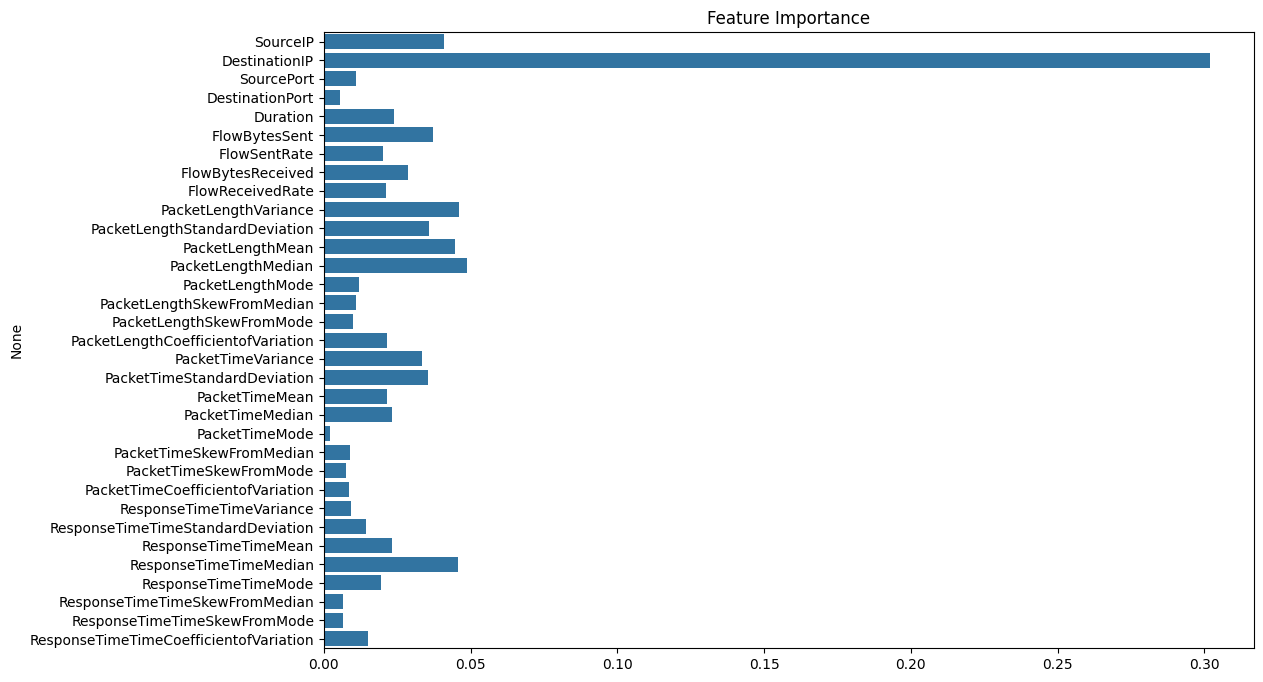

In [91]:
# make predictions
y_pred = rf.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=rf.feature_importances_, y=data.drop(["TimeStamp",label],axis=1).columns)
plt.title('Feature Importance')



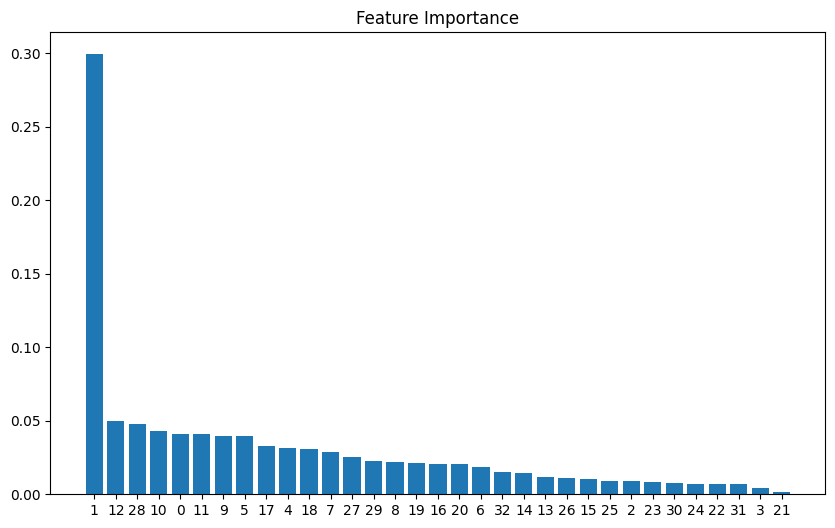

In [ ]:
# feature importance in random forest 

